<a href="https://colab.research.google.com/github/jxhangithub/master-machine-learning-engineer/blob/main/BasicModels/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case Study: Building an Image Classification Model with Transfer Learning

This case study demonstrates how to develop an image classification model using transfer learning on the **CIFAR-10 Dataset**. We explore preprocessing techniques, feature extraction, and transfer learning with a pretrained model to classify images into ten categories.

### Dataset Overview

The **CIFAR-10 Dataset** is a widely used benchmark for image classification tasks. It contains:
- **Images**: 60,000 color images, each 32x32 pixels.
- **Classes**: 10 categories such as airplanes, automobiles, birds, cats, and dogs.
- **Split**: 50,000 training images and 10,000 test images.

The dataset is available through the [CIFAR-10 website](https://www.cs.toronto.edu/~kriz/cifar.html).

## Step 1: Data Preparation

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


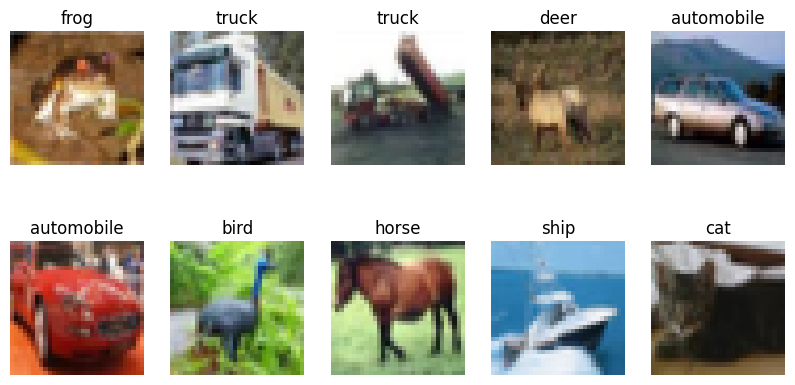

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display a few sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

### Preprocessing Steps:
1. **Normalization**: Scale pixel values to the range [0, 1] to stabilize training.
2. **One-Hot Encoding**: Convert class labels into one-hot vectors for compatibility with classification models.

In [2]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Step 2: Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

# Apply augmentation
datagen.fit(x_train)

## Step 3: Transfer Learning with Pretrained Models

Using a pretrained model such as ResNet50 allows leveraging learned features from large-scale datasets like ImageNet, reducing training time and improving performance.

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pretrained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 296s 183ms/step - accuracy: 0.1659 - loss: 2.2743 - val_accuracy: 0.2550 - val_loss: 2.0067
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 280s 179ms/step - accuracy: 0.2386 - loss: 2.0613 - val_accuracy: 0.3076 - val_loss: 1.9181
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 281s 180ms/step - accuracy: 0.2507 - loss: 2.0300 - val_accuracy: 0.3354 - val_loss: 1.8721
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 335s 215ms/step - accuracy: 0.2652 - loss: 2.0063 - val_accuracy: 0.3170 - val_loss: 1.8899
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 335s 215ms/step - accuracy: 0.2722 - loss: 1.9896 - val_accuracy: 0.3050 - val_loss: 1.9050
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 376s 211ms/step - accuracy: 0.2783 - loss: 1.9785 - val_accuracy: 0.3522 - val_loss: 1.8359
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 285s 182ms/step - accuracy: 0.2760 - loss: 1.9720 - val_accuracy: 0.3189 - val_loss: 1.8719
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 284s 182ms/step - accuracy: 0.2

## Step 4: Model Evaluation and Optimization

In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.3516 - loss: 1.8168
Test Accuracy: 0.35


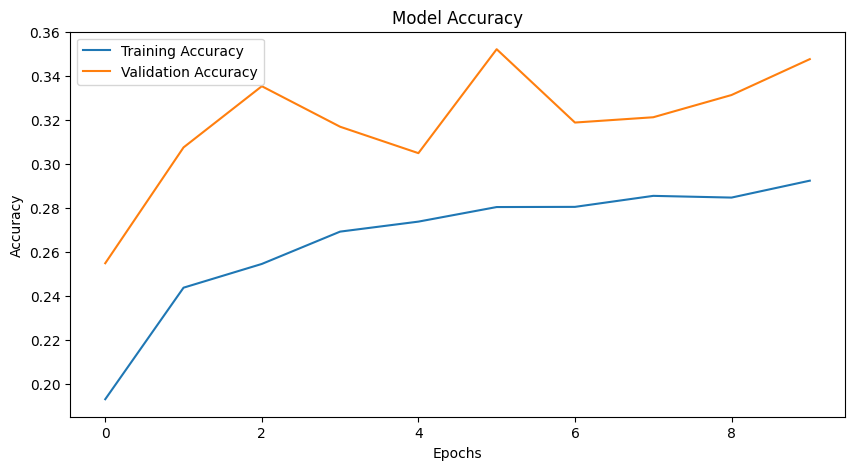

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Step 5: Deployment and Applications

### Deployment Options:
- **Batch Inference**: Use the model for batch predictions on datasets, such as categorizing large image collections.
- **Real-Time Classification**: Deploy the model on a web application or mobile app for live image recognition.

### Applications:
1. **E-Commerce**: Automatically categorize product images for streamlined inventory management.
2. **Healthcare**: Classify medical images to aid diagnostics, such as detecting diseases in X-rays.
3. **Autonomous Vehicles**: Recognize objects like pedestrians and traffic signs in real-time.

## Summary and Recommendations

### Summary:
- **Preprocessing**: Normalization and augmentation improve model robustness and performance.
- **Transfer Learning**: Pretrained models like ResNet50 reduce training time and achieve higher accuracy with smaller datasets.
- **Evaluation and Optimization**: Monitoring training and validation performance ensures the model generalizes well.

### Recommendations:
- Use **data augmentation** to artificially expand training datasets, especially when data is limited.
- Apply **transfer learning** to leverage powerful pretrained models for small or medium-sized datasets.
- Continuously monitor performance metrics during training to detect overfitting or underfitting.

By following these steps, practitioners can build robust image classification models that generalize well to real-world applications, making them suitable for deployment in diverse domains.